Sony stock price prediction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Sony_10y.csv')

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))

In [8]:
training_set_scaled = sc.fit_transform(training_set)

In [9]:
X_tr = [] 

In [10]:
y_tr = [] 

In [11]:
for i in range(90, 2519):
    X_tr.append(training_set_scaled[i-90:i, 0])
    y_tr.append(training_set_scaled[i, 0])

In [12]:
X_tr, y_tr = np.array(X_tr), np.array(y_tr)

In [13]:
X_tr = np.reshape(X_tr, (X_tr.shape[0],X_tr.shape[1], 1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
regressor = Sequential()

In [16]:
regressor.add(LSTM(units = 50, return_sequences =True, input_shape = (X_tr.shape[1], 1)))

In [17]:
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50, return_sequences =True))

In [19]:
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))

In [21]:
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50))

In [23]:
regressor.add(Dropout(0.2))

In [24]:
regressor.add(Dense(units = 1))

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
regressor.fit(X_tr, y_tr, epochs = 100, batch_size = 32)

Epoch 1/100
2429/2429 [==============================] - 42s 17ms/step - loss: 0.0024
Epoch 2/100
2429/2429 [==============================] - 53s 22ms/step - loss: 0.0027
Epoch 3/100
2429/2429 [==============================] - 40s 16ms/step - loss: 0.0024
Epoch 4/100
2429/2429 [==============================] - 41s 17ms/step - loss: 0.0022
Epoch 5/100
2429/2429 [==============================] - 39s 16ms/step - loss: 0.0022
Epoch 6/100
2429/2429 [==============================] - 42s 17ms/step - loss: 0.0023
Epoch 7/100
2429/2429 [==============================] - 40s 16ms/step - loss: 0.0020
Epoch 8/100
2429/2429 [==============================] - 40s 17ms/step - loss: 0.0021
Epoch 9/100
2429/2429 [==============================] - 45s 18ms/step - loss: 0.0021
Epoch 10/100
2429/2429 [==============================] - 42s 17ms/step - loss: 0.0020
Epoch 11/100
2429/2429 [==============================] - 45s 18ms/step - loss: 0.0018
Epoch 12/100
2429/2429 [============================

2429/2429 [==============================] - 38s 16ms/step - loss: 7.8953e-04
Epoch 94/100
2429/2429 [==============================] - 40s 16ms/step - loss: 7.1246e-04
Epoch 95/100
2429/2429 [==============================] - 39s 16ms/step - loss: 7.4482e-04
Epoch 96/100
2429/2429 [==============================] - 41s 17ms/step - loss: 7.2500e-04
Epoch 97/100
2429/2429 [==============================] - 40s 17ms/step - loss: 7.5473e-04
Epoch 98/100
2429/2429 [==============================] - 42s 17ms/step - loss: 7.2609e-04
Epoch 99/100
2429/2429 [==============================] - 41s 17ms/step - loss: 8.1880e-04
Epoch 100/100
2429/2429 [==============================] - 40s 16ms/step - loss: 6.7956e-04


In [73]:
dataset_test = pd.read_csv('Sony_1m.csv')

In [62]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [63]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [75]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values 


In [76]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [77]:
X_test = []

In [78]:
for i in range(90, 110):
    X_test.append(inputs[i-90:i, 0])

In [79]:
X_test = np.array(X_test)

In [80]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))

In [81]:
predicted_stock_price = regressor.predict(X_test)

In [82]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

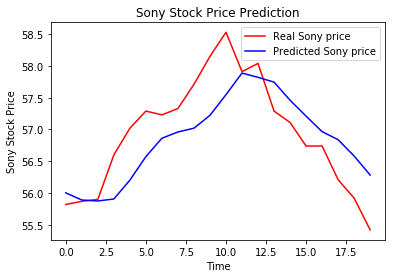

In [89]:
plt.plot(real_stock_price, color = 'red', label =
'Real Sony price')
plt.plot(predicted_stock_price, color = 'blue', label =
'Predicted Sony price')
plt.title('Sony Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Sony Stock Price')
plt.legend()
plt.show()